# **S11. Simple linear regression**

**Regression** is a statistical supervised learning technique to predict the quantitative variable by forming a linear relationship with one or more independent features.

### Regression terms

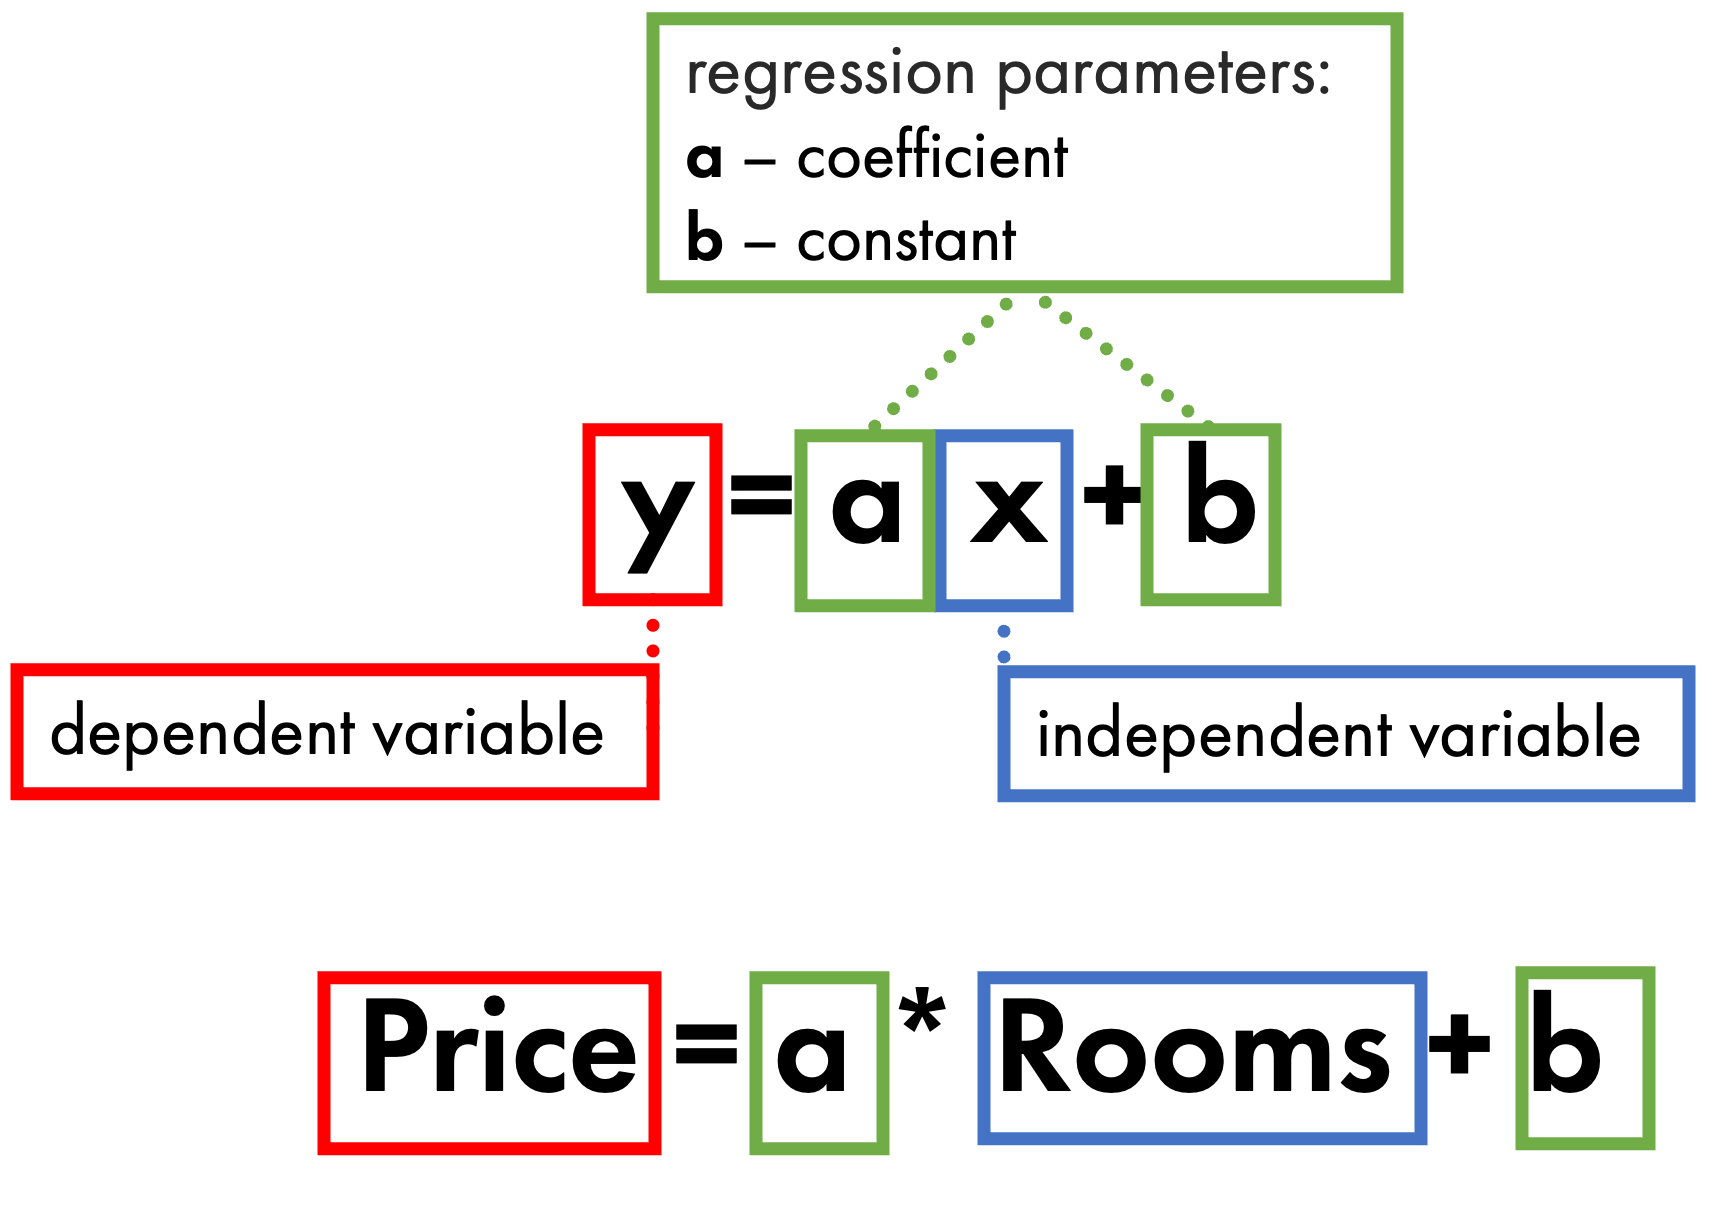

### Finding regression parameters

Find the regression parameters that predict the price of an apartment depending on the number of rooms by the **OLS** (ordinary least squares) method

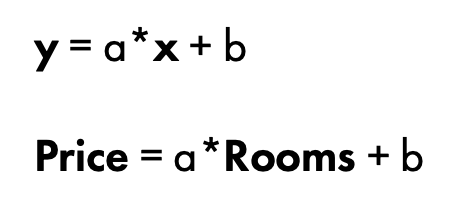

In [1]:
import pandas as pd
import numpy as np



data = pd.DataFrame()
data['Price'] = [3000, 4000, 1500, 6000, 4000, 1650, 3250, 5000, 2500]
data['Rooms'] = [2, 2, 1, 4, 3, 1, 2, 3, 1]

data

,Price,Rooms
0,3000,2
1,4000,2
2,1500,1
3,6000,4
4,4000,3
5,1650,1
6,3250,2
7,5000,3
8,2500,1


<AxesSubplot:xlabel='Rooms', ylabel='Price'>

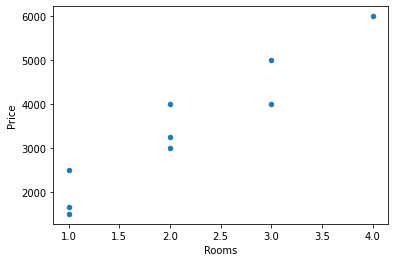

In [2]:
data.plot('Rooms', 'Price', kind = 'scatter')

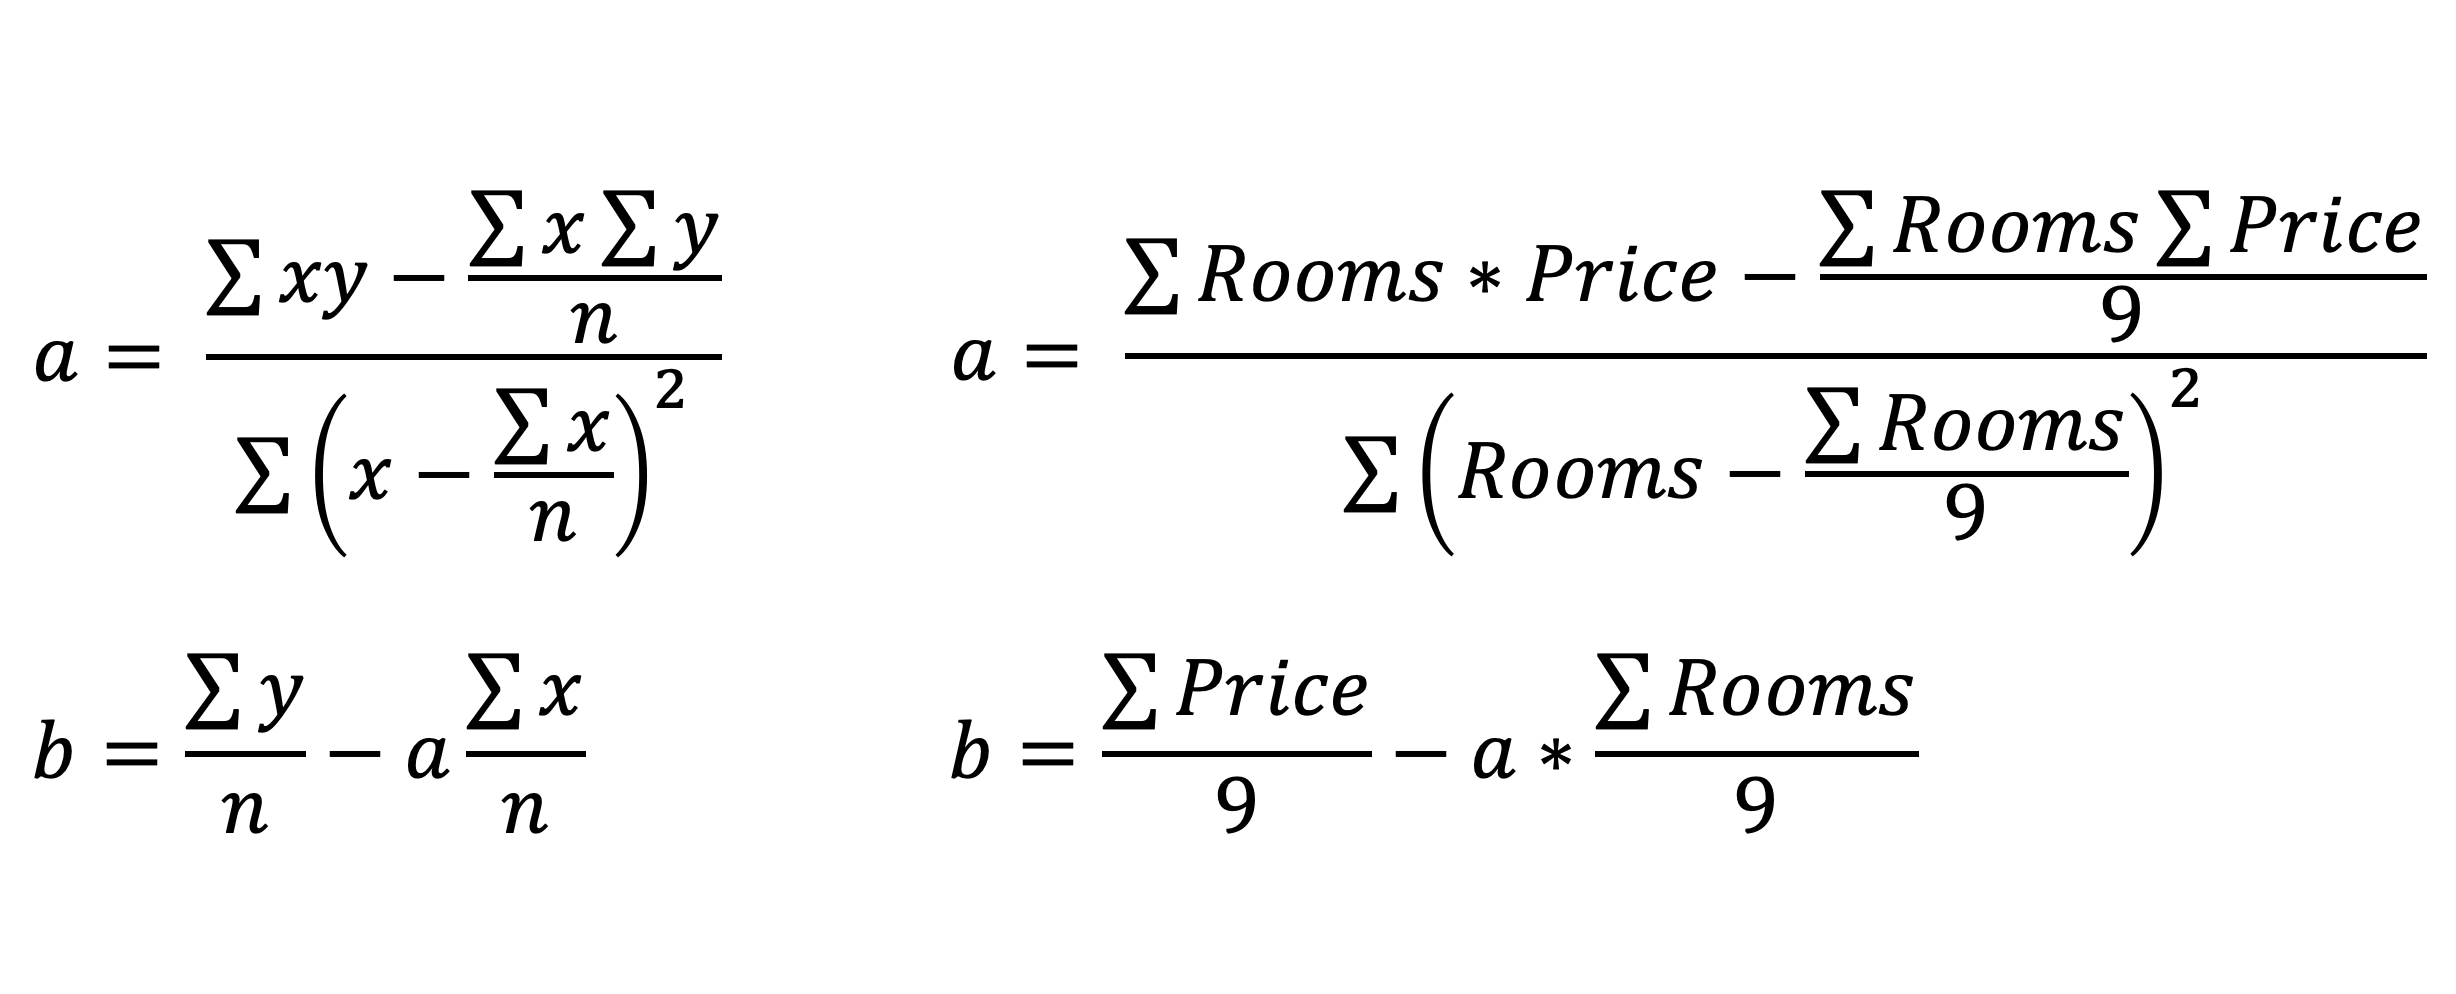

1. Find coefficient **a**

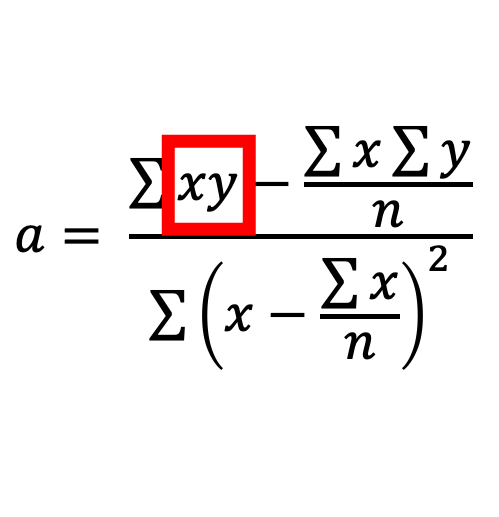

In [3]:
data['Rooms*Price'] = data['Rooms']*data['Price']
data

,Price,Rooms,Rooms*Price
0,3000,2,6000
1,4000,2,8000
2,1500,1,1500
3,6000,4,24000
4,4000,3,12000
5,1650,1,1650
6,3250,2,6500
7,5000,3,15000
8,2500,1,2500


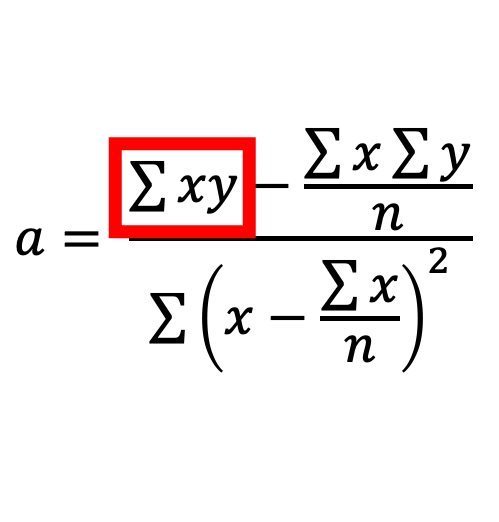

In [4]:
rp = data['Rooms*Price'].sum()
rp

77150

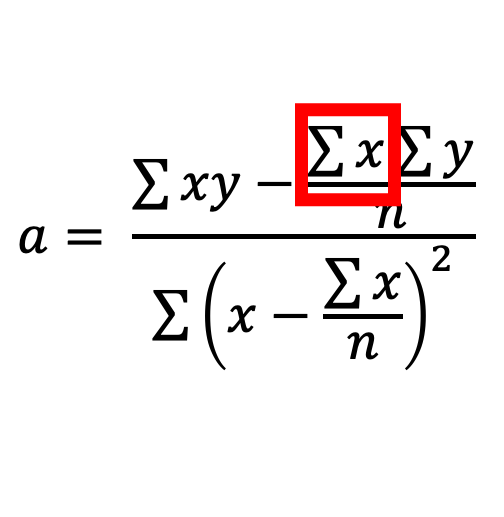

In [5]:
rooms_sum = data['Rooms'].sum()
rooms_sum

19

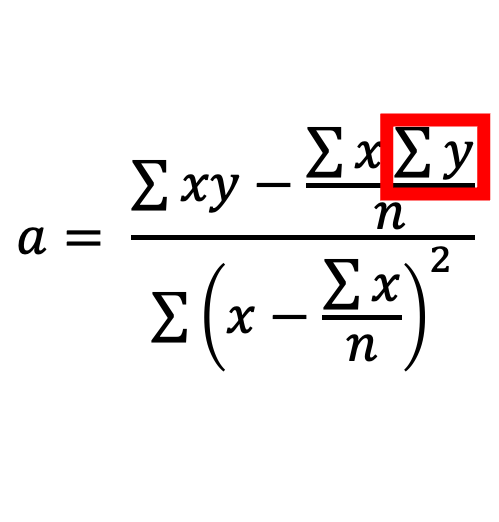

In [6]:
price_sum = data['Price'].sum()
price_sum

30900

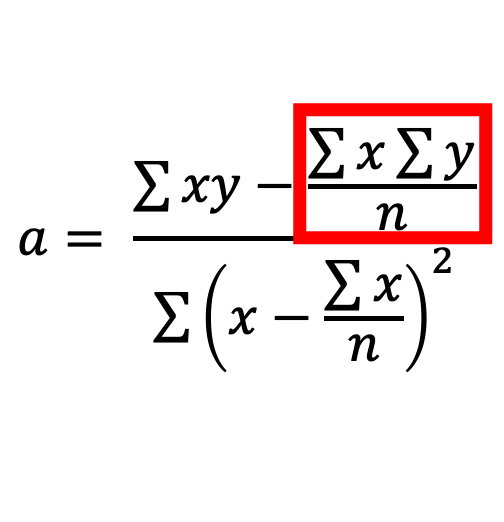

In [7]:
rooms_price_n = (rooms_sum*price_sum)/data.shape[0]
rooms_price_n

65233.333333333336

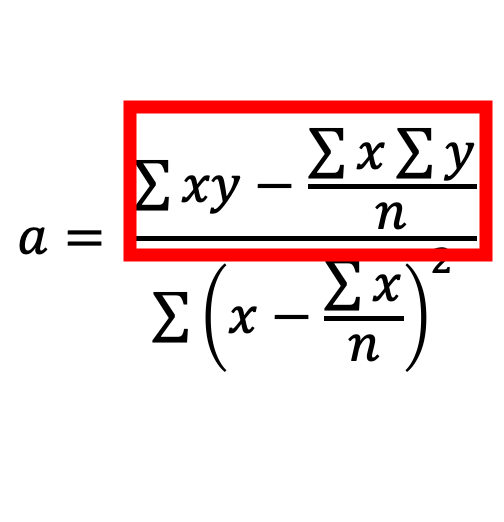

In [8]:
up = rp-rooms_price_n
up

11916.666666666664

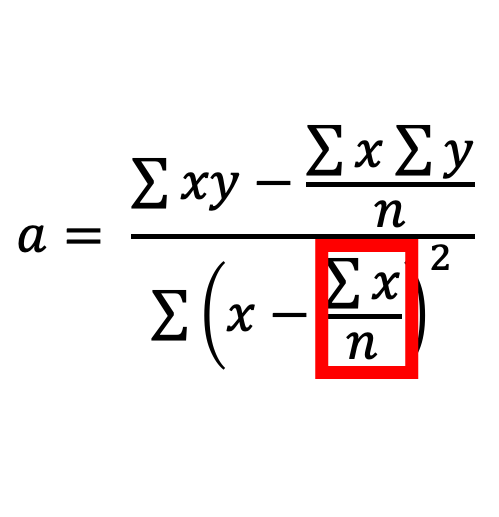

In [9]:
rooms_avg = data['Rooms'].mean()
rooms_avg

2.111111111111111

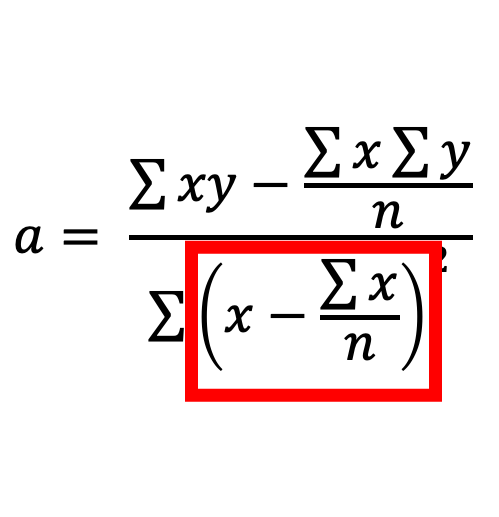

In [10]:
data['Rooms-Rooms_avg'] = data['Rooms']-rooms_avg
data

,Price,Rooms,Rooms*Price,Rooms-Rooms_avg
0,3000,2,6000,-0.111111
1,4000,2,8000,-0.111111
2,1500,1,1500,-1.111111
3,6000,4,24000,1.888889
4,4000,3,12000,0.888889
5,1650,1,1650,-1.111111
6,3250,2,6500,-0.111111
7,5000,3,15000,0.888889
8,2500,1,2500,-1.111111


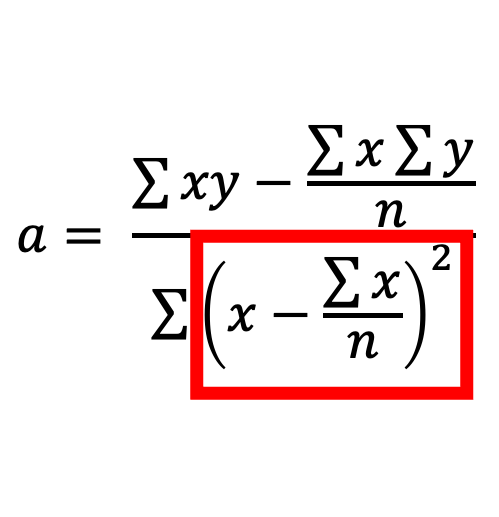

In [11]:
data['(Rooms-Rooms_avg)^2'] = data['Rooms-Rooms_avg']**2
data

,Price,Rooms,Rooms*Price,Rooms-Rooms_avg,(Rooms-Rooms_avg)^2
0,3000,2,6000,-0.111111,0.012346
1,4000,2,8000,-0.111111,0.012346
2,1500,1,1500,-1.111111,1.234568
3,6000,4,24000,1.888889,3.567901
4,4000,3,12000,0.888889,0.790123
5,1650,1,1650,-1.111111,1.234568
6,3250,2,6500,-0.111111,0.012346
7,5000,3,15000,0.888889,0.790123
8,2500,1,2500,-1.111111,1.234568


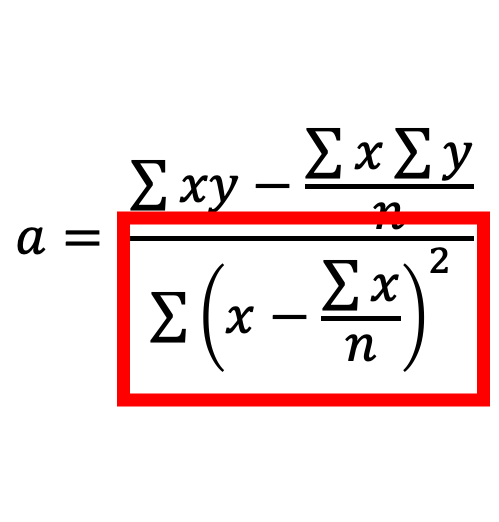

In [12]:
down= data['(Rooms-Rooms_avg)^2'].sum()
down

8.88888888888889

In [13]:
a = up/down
a

1340.6249999999998

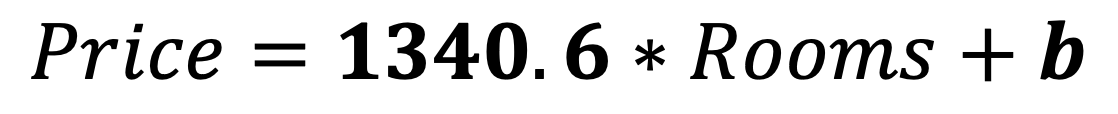

2. Find the value of the constant **b**:

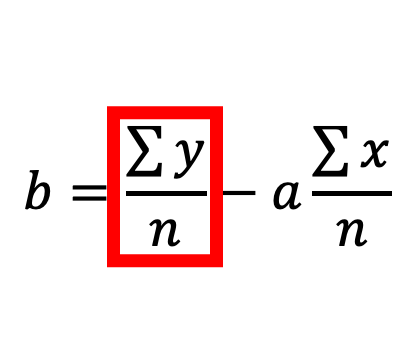

In [14]:
price_avg = data['Price'].mean()
price_avg

3433.3333333333335

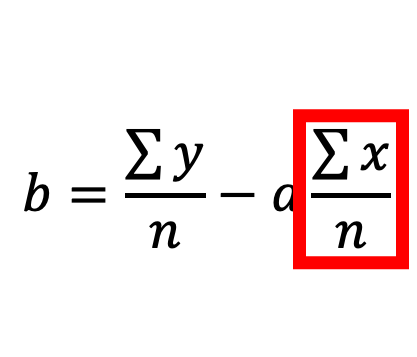

In [15]:
rooms_avg

2.111111111111111

In [16]:
b = price_avg-a*rooms_avg
b

603.1250000000005

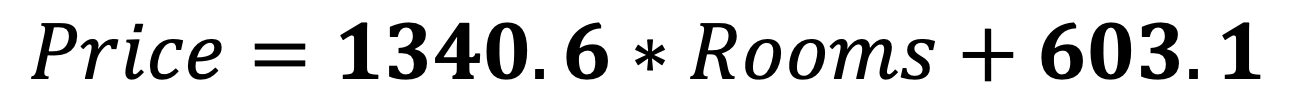

### Interpreting parameters in regression

#### **Geometric interpretation**

##### *In general:*

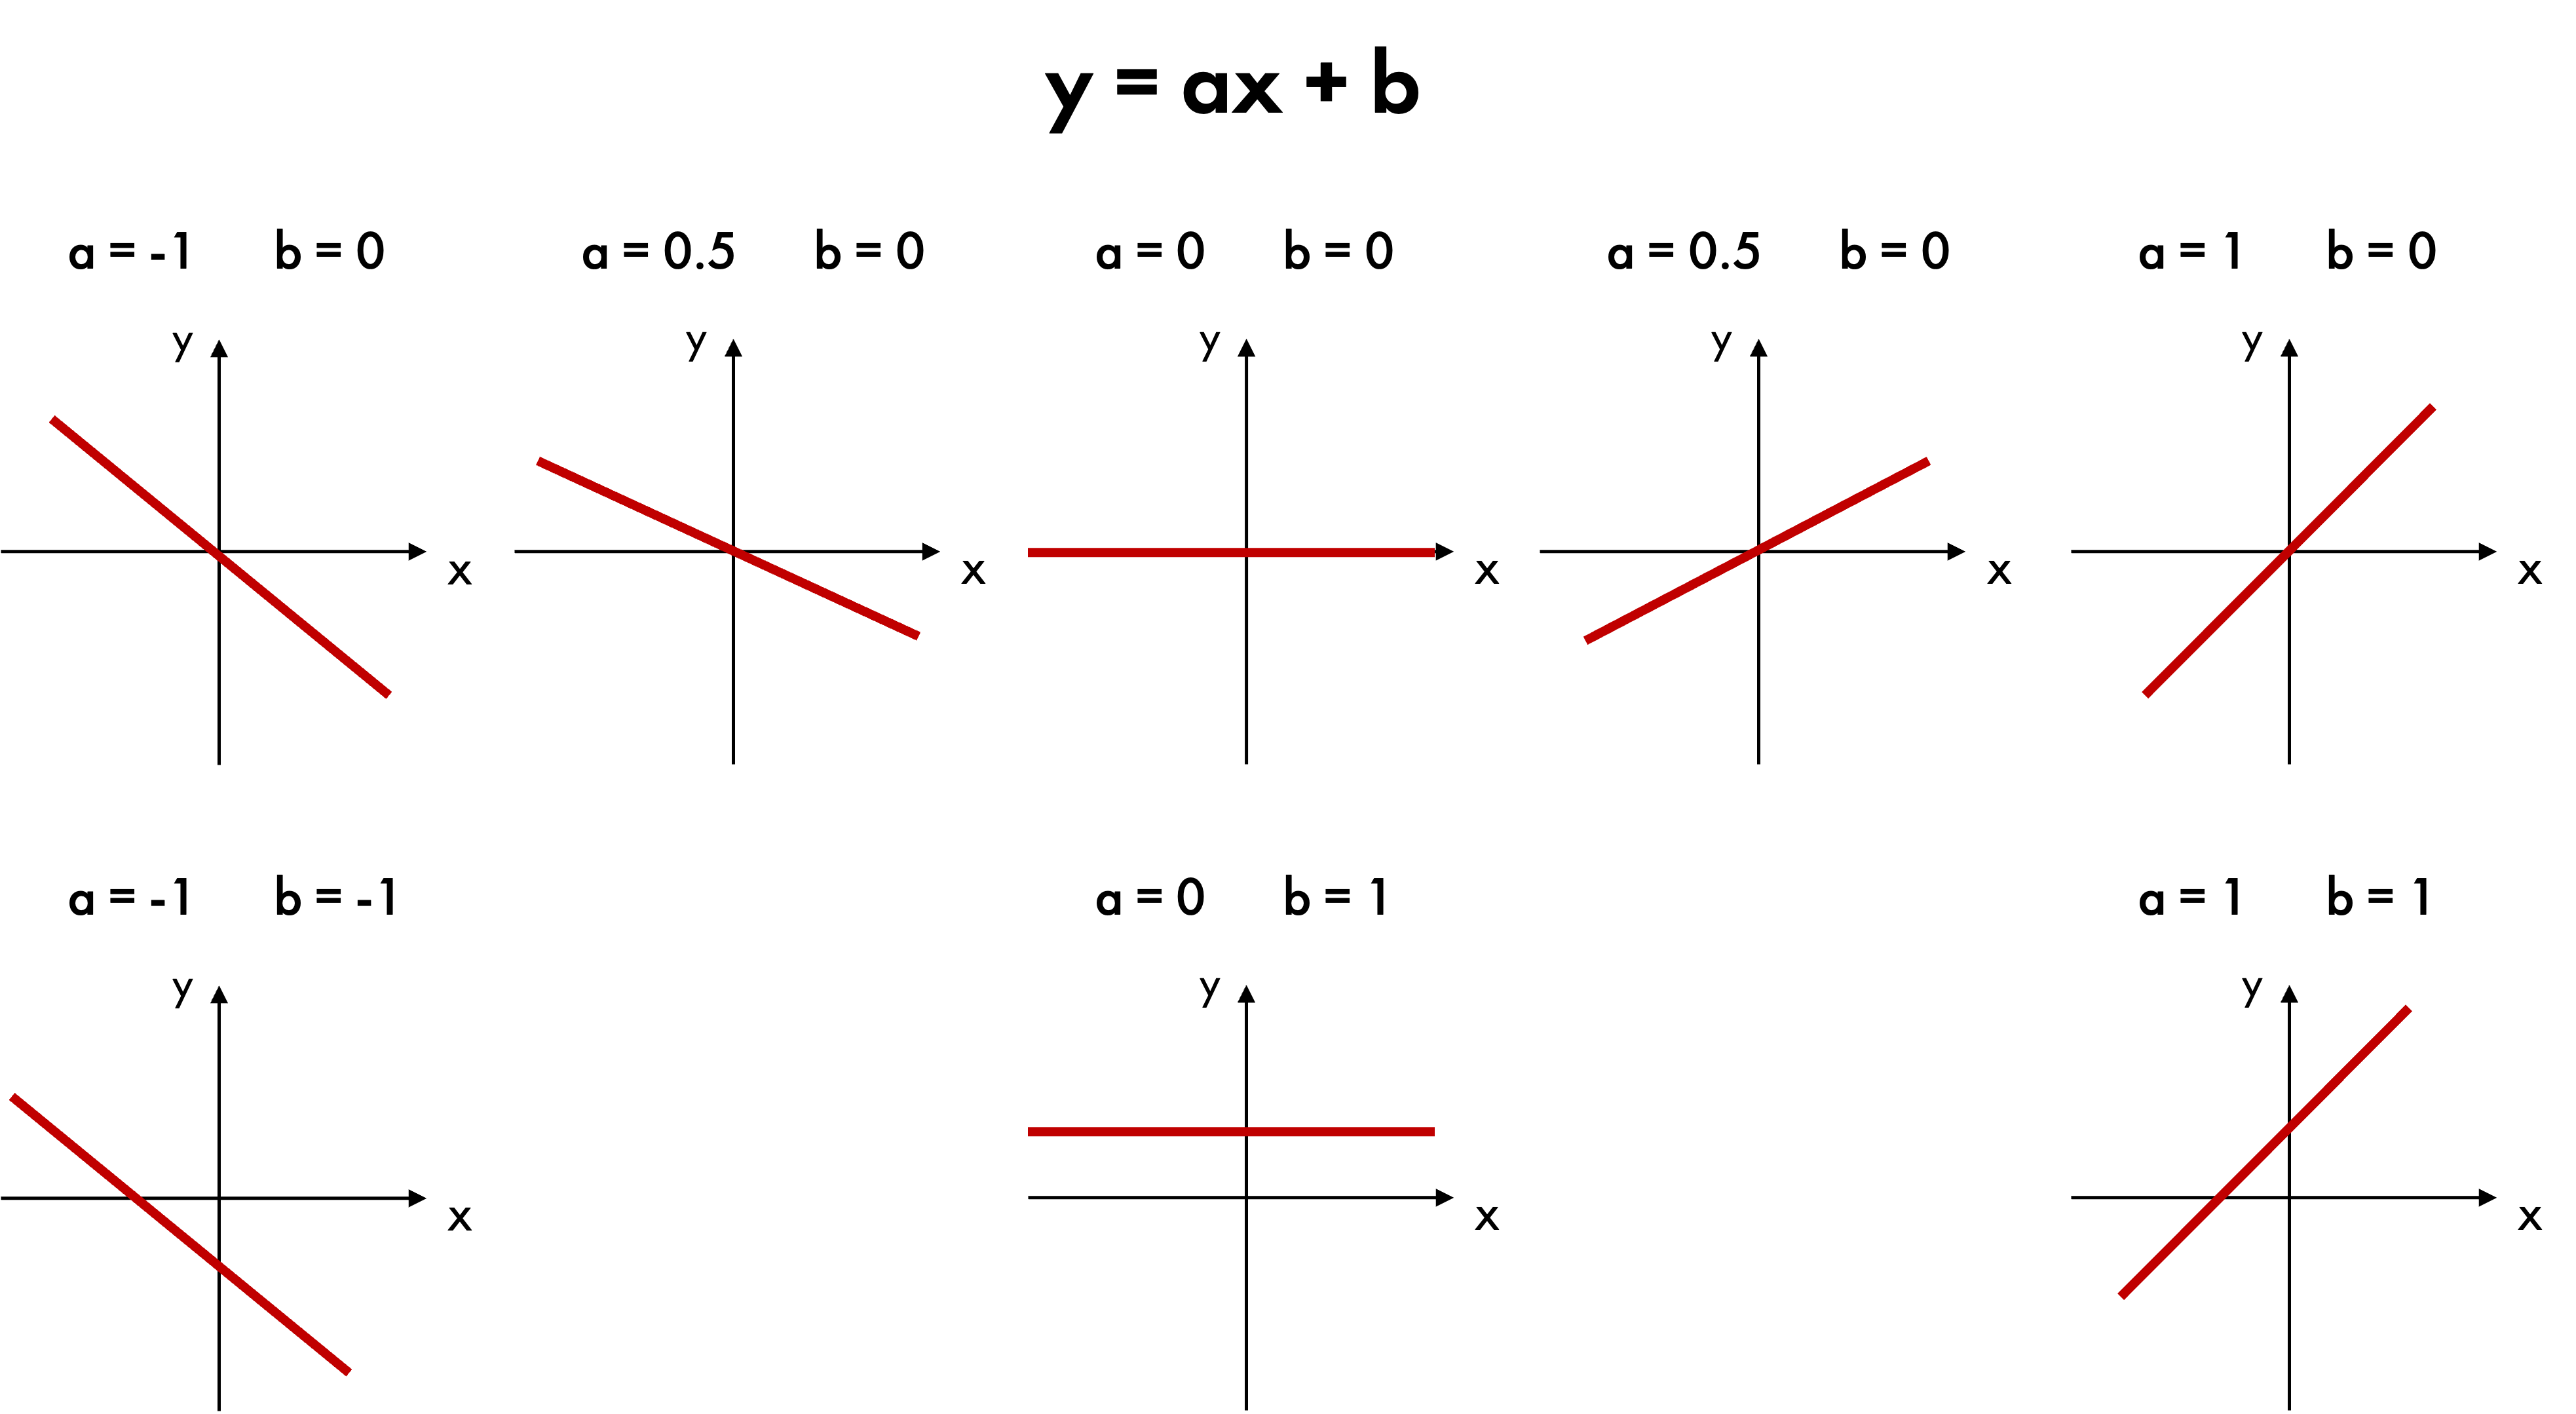

**a** - slop

**b** - y-shift, y-intercept

##### *Example:*

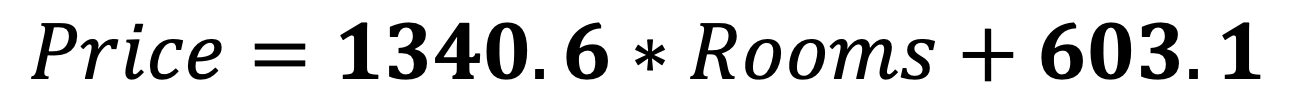

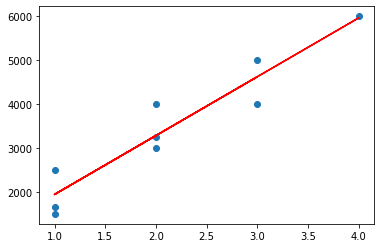

In [17]:
import matplotlib.pyplot as plt

plt.scatter(data['Rooms'], data['Price'])
plt.plot(data['Rooms'], a*data['Rooms']+b, color = 'r')

####**Practical interpretation**

##### *In general:*

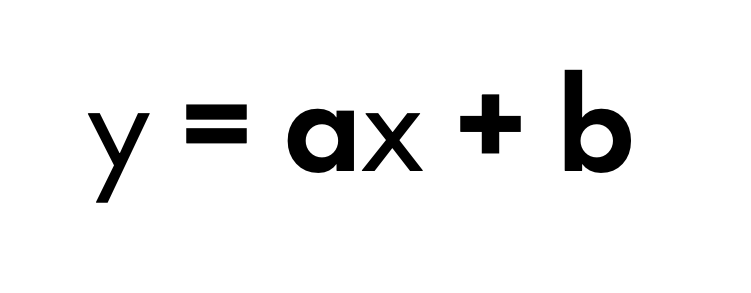

Whole regression:
- If **independent variable** is equal to **N**, then **dependent variable** is equal to **aN+b**


Coefficient **a** (coefficient before **x**):

- If **a>0**:

On average, as the independent variable **increases** by **one** **dependent variable** **increases by a**

- If **a<0**:

On average, as the independent variable **decreases** by **one** **dependent variable** **decreases by a**

- If **a=0**:

The independent variable **has no effect** on the target variable

Coefficient **b** (constant):

- If the independent variable is 0, then the dependent variable is **b**

*(not always possible to interpret)*

##### *Example:* 

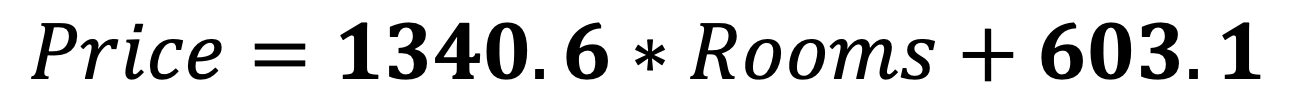

Whole regression:

- If the apartment has **1 room**, then the **price** of the apartment will be on average **1943.7**

- If the apartment has **7 rooms**, then the **price** of the apartment will be on average **9987.3**

- ...

Coefficient **a** (coefficient before **x**):

- On average, with **increase** in the number of rooms **per unit** **price** of an apartment **increases by 1340.6**

Coefficient **b** (constant):

- In this case, the coefficient **b** cannot be interpreted, because the number of rooms cannot be equal to 0

> But, for example, if our regression equation describes the impact of the level of corruption on the country's GDP:

> **GDP (trillion $)** = -10 ***Corruption Level** +200

> then the free coefficient **200** can be interpreted as follows:

> -If the country **0 level of corruption**, then in the **GDP** of the country will be equal to **200 trillion. $**

### Regression quality assessment

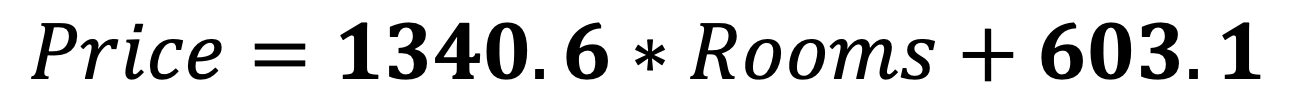

We cannot thoughtlessly trust the obtained parameters, we need to make sure that the resulting regression equation (our straight line) describes the initial data well enough. This can be done using regression quality metrics:

* **MSE** (Mean Square Error)
* **MAE** (mean absolute error)
* **R^2** (determination coefficient)

#### **MSE**

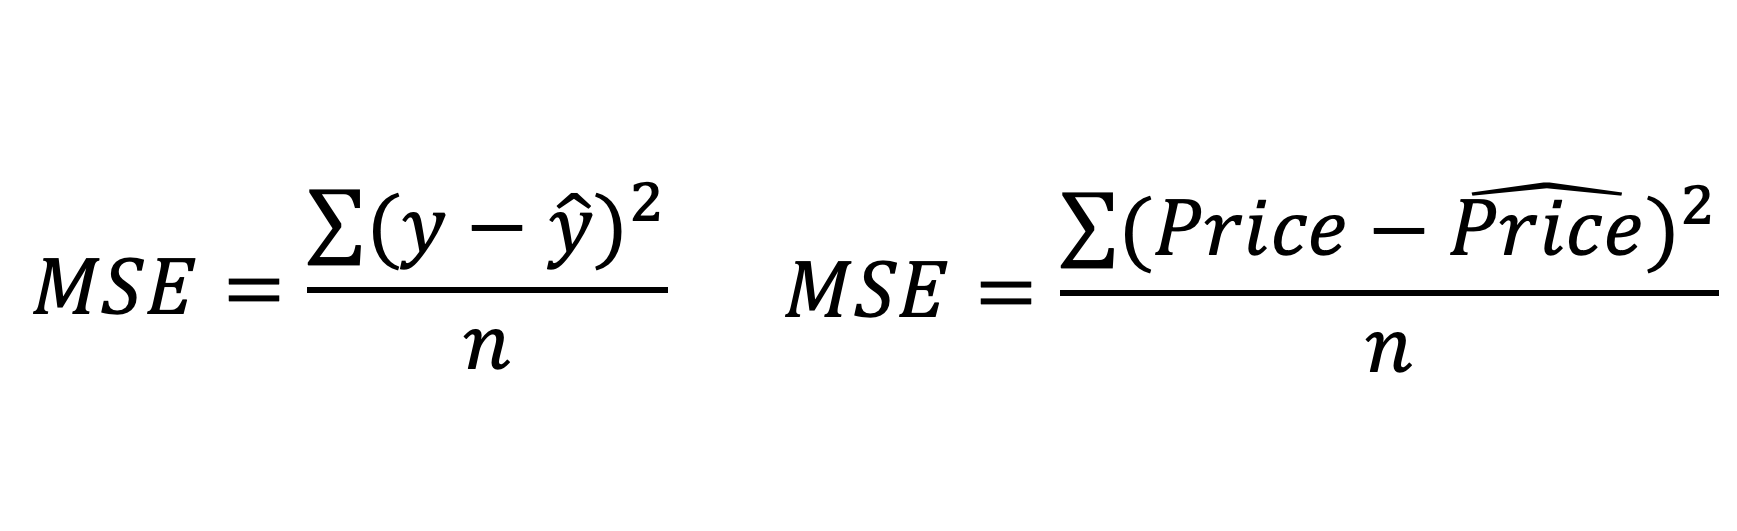

In [30]:
data['Price_pr'] = 1340.6*data['Rooms']+603.1
data[['Price', 'Rooms', 'Price_pr']]

,Price,Rooms,Price_pr
0,3000,2,3284.3
1,4000,2,3284.3
2,1500,1,1943.7
3,6000,4,5965.5
4,4000,3,4624.9
5,1650,1,1943.7
6,3250,2,3284.3
7,5000,3,4624.9
8,2500,1,1943.7


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
mean_squared_error(data['Price'], data['Price_pr']) ** 0.5 # rmse

437.06328171355483

In [34]:
mean_absolute_error(data['Price'], data['Price_pr'])

373.6111111111111

In [36]:
r2_score(data['Price'], data['Price_pr'])

0.9028415478948856

In [25]:
data['(Price-Price_pr)^2'] = (data['Price']- data['Price_pr'])**2
data[['Price', 'Price_pr', '(Price-Price_pr)^2']]

,Price,Price_pr,(Price-Price_pr)^2
0,3000,3284.3,80826.49
1,4000,3284.3,512226.49
2,1500,1943.7,196869.69
3,6000,5965.5,1190.25
4,4000,4624.9,390500.01
5,1650,1943.7,86259.69
6,3250,3284.3,1176.49
7,5000,4624.9,140700.01
8,2500,1943.7,309469.69


In [26]:
mse = data['(Price-Price_pr)^2'].sum()/data.shape[0]
mse

191024.31222222222

In [21]:
from sklearn.metrics import mean_squared_error
mse_ = mean_squared_error(data['Price'], data['Price_pr'])
print(mse_)

191024.31222222222


The resulting value is relative, and does not give us a clear boundary between a good and bad model. But thanks to MSE, we can compare models with each other:
- the best one will be the one with the value of **MSE** less



#### **MAE**

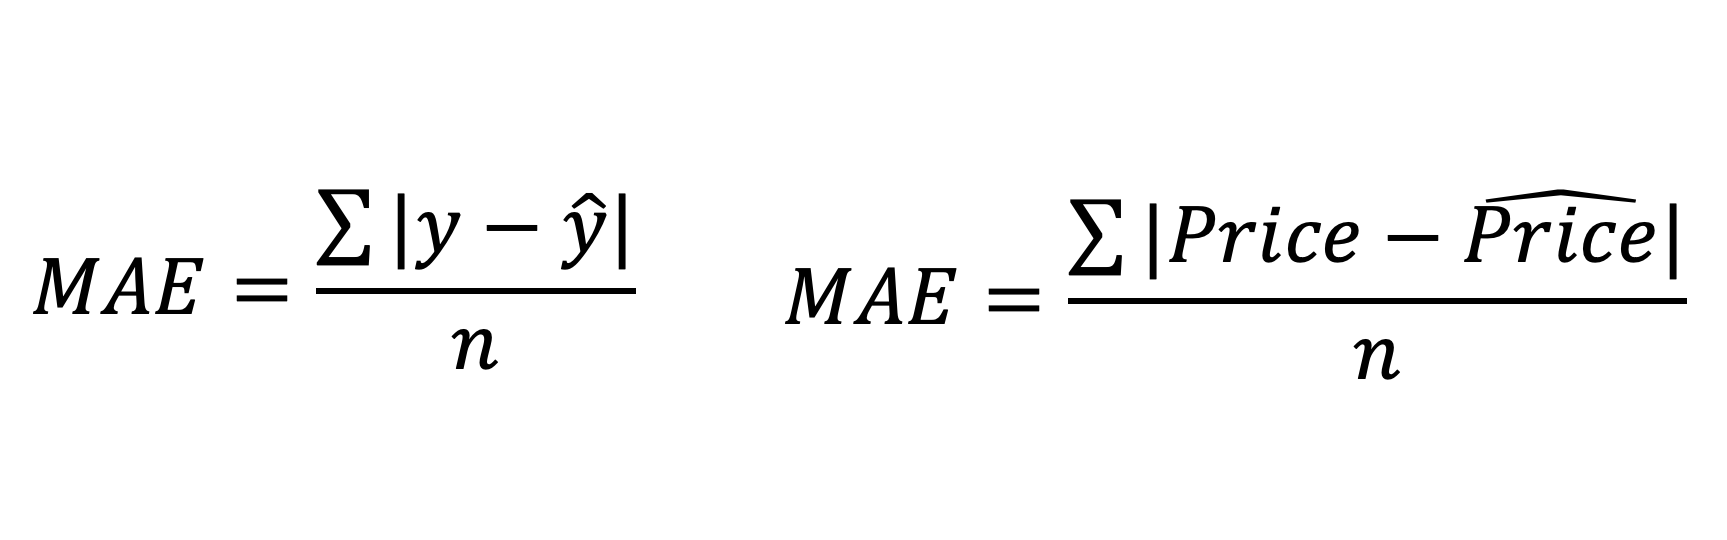

In [27]:
data['|Price-Price_pr|'] = abs(data['Price']- data['Price_pr'])
data[['Price', 'Price_pr', '|Price-Price_pr|']]

,Price,Price_pr,|Price-Price_pr|
0,3000,3284.3,284.3
1,4000,3284.3,715.7
2,1500,1943.7,443.7
3,6000,5965.5,34.5
4,4000,4624.9,624.9
5,1650,1943.7,293.7
6,3250,3284.3,34.3
7,5000,4624.9,375.1
8,2500,1943.7,556.3


In [28]:
mae = data['|Price-Price_pr|'].sum()/data.shape[0]
mae

373.6111111111111

In [24]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(data['Price'], data['Price_pr'])

373.6111111111111

The resulting value is relative, and does not give us a clear boundary between a good and bad model. But thanks to MAE, we can compare models with each other:
- the best one will be the one with the value of **MAE** less

#### **R^2**

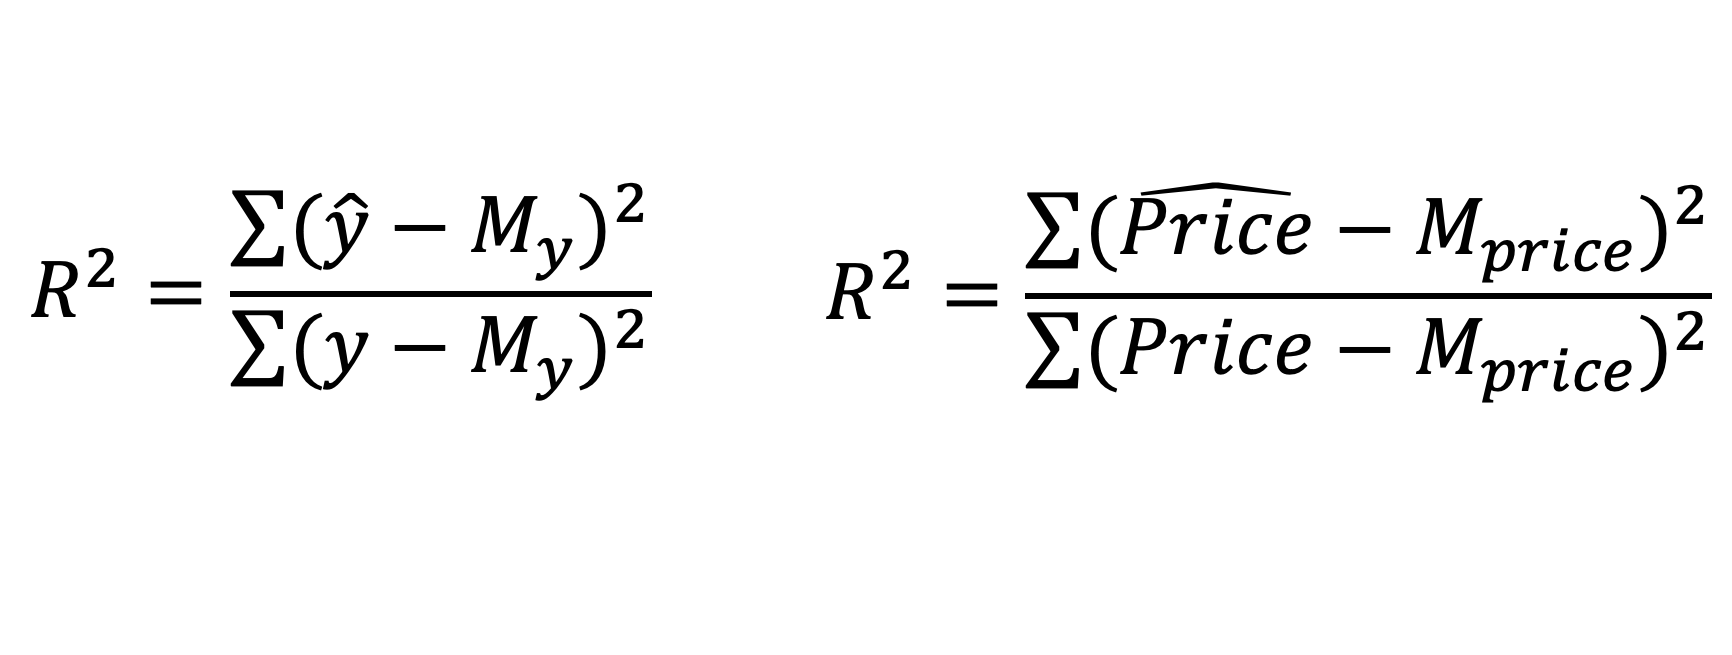

In [25]:
data['(Price_pr-Price_avg)^2'] = (data['Price_pr']-data['Price'].mean())**2
data[['Price_pr', '(Price_pr-Price_avg)^2']]

,Price_pr,(Price_pr-Price_avg)^2
0,3284.3,2.221093e+04
1,3284.3,2.221093e+04
2,1943.7,2.219007e+06
3,5965.5,6.411868e+06
4,4624.9,1.419831e+06
5,1943.7,2.219007e+06
6,3284.3,2.221093e+04
7,4624.9,1.419831e+06
8,1943.7,2.219007e+06


In [26]:
up = data['(Price_pr-Price_avg)^2'].sum()
up

15975185.476666667

In [27]:
data['(Price-Price_avg)^2'] = (data['Price']-data['Price'].mean())**2
data[['Price', '(Price-Price_avg)^2']]

,Price,(Price-Price_avg)^2
0,3000,1.877778e+05
1,4000,3.211111e+05
2,1500,3.737778e+06
3,6000,6.587778e+06
4,4000,3.211111e+05
5,1650,3.180278e+06
6,3250,3.361111e+04
7,5000,2.454444e+06
8,2500,8.711111e+05


In [28]:
down = data['(Price-Price_avg)^2'].sum()
down

17695000.0

In [29]:
r2 = up/down
r2

0.9028078822642931

This means that we can explain with our equation up to **0.06%** of the scatter in the data.

*This low value is due to the small number of observations*

- The closer the coefficient of determination is to 1, the better our model, good . Model parameters can be trusted if **R^2 is greater than 0.5**. Such a model can be considered acceptable. If **R^2 is greater than 0.7**, then the model can be considered good




### Types of regressions

In terms of the number of factors used, regression is:
- **Simple Linear Regression**

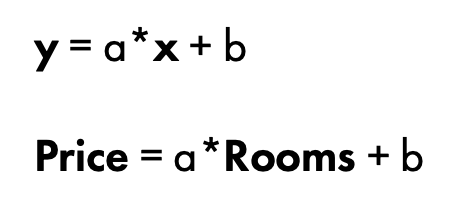

-  **Multiple Linear Regression**

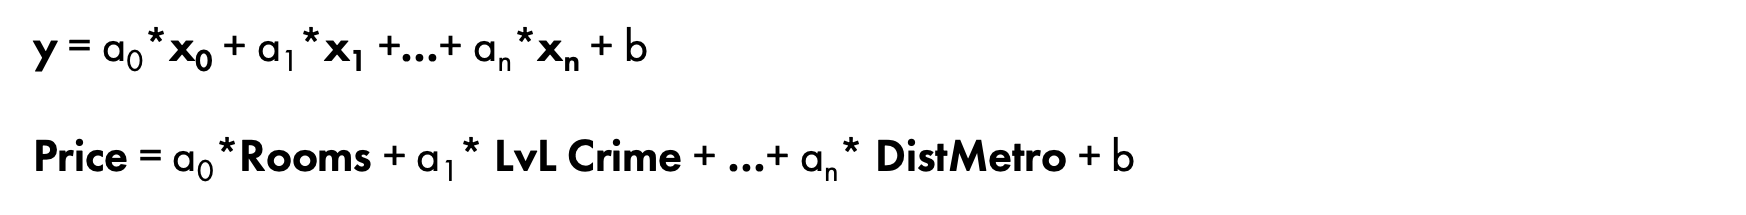

## Practice

Information about the cost of housing in different houses in Boston:

**crime** - crime rate per capita by region.

**zn** - share of residential land zoned for plots over 25,000 sq. ft.

**indus** - % of the area of ​​the district (in which the apartment is located) occupied by business (not retail)

**chas** - located near the river (1 - near the river, 0 - not near the river)

**nox** - concentration of nitrogen oxides

**rooms** - average number of rooms per apartment.

**age** - share of apartments in which the same owners have been living permanently for more than 30 years

**dis** - distance to the center

**rad** - accessibility index to main transport routes

**tax** is the total cost of property tax for $10,000.

**ptratio** - number of students/number of teachers.

**b** - 1000(Bk - 0.63) ^ 2, where Bk is the proportion of blacks by city

**lstat** - % of the poor population in the district

**price** - average cost of owner-occupied apartments (thousand dollars)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c_l = ['crime', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']

df = pd.read_csv("housing.csv", sep="\s+", names=c_l)
df

,crime,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


1. Plot a graph showing the relationship between the average apartment price (**price**) and the percentage of poor people in the area (**lstat**).

**What is the trend of the data?**

*your answer is here*

2. Calculate and interpret the correlation coefficient between these two variables

*your interpretation here*

3. Build a linear regression model that shows the effect of % poor in the area (**lstat**) on the average apartment price (**price**)

In [32]:
import scipy.stats #library for building simple linear regression

X = #independent variable
y = #dependent variable

res = scipy.stats.linregress(X, y) #results of regression
print(res)

SyntaxError: invalid syntax (3041983146.py, line 3)

4. In the data obtained by the regression model, there is a parameter **rvalue**, which is the **root of the coefficient of determination**. Interpret it. What is the quality of the built regression model?

In [ ]:
res.rvalue**2

*your interpretation here*

5. In the data obtained by the regression model, the parameter

**slope** - slope of the obtained straight line / coefficient before the independent variable

**intercept** - point of intersection of the line with the y-axis(**price**) / constant

Write a regression equation for the data obtained:

In [ ]:
#your regression equation here

6. Add the resulting regression model to the scatterplot of apartment price (**price**) and % of poor (**lstat**)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label='original data')
plt.plot(X, #your regression equation here,
         'r', label='regression line')
plt.legend()
plt.show()

7. Now check that the received parameter before the independent variable is **statistically significant**. This can be determined based on the **pvalue** indicator from the constructed regression model:

- If the **pvalue is less than 0.05**, then the resulting **parameter** of the independent variable is **statistically significant** *(at the 95% level)*

Check this (result should be True/False answer):



8. Interpret those regression parameters that are possible

**Coefficient before independent variable:**

*your interpretation here*

**Constant:**

*your interpretation here*

9. According to the model, what would be the price of an apartment if the % of poor population in the district is 25%?

10. Calculate the **MSE (Mean Square Error)** of the resulting model

`sklearn`:

on one's own:

11. Calculate the **MAE (mean absolute error)** of the resulting model

`sklearn`:

on one's own: